# **Exploratory Data Analysis for Assignment 04 LSTM Time Series Los Angeles**

In [12]:
# Data Analysis Libraries
import numpy as np
import pandas as pd
import math

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis Libraries
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(
    action="ignore",
    module= "scipy",    
    message="^internal gelsd"
)
warnings.filterwarnings(
    action="ignore",
    module= "seaborn",    
    message="^internal gelsd"
)

In [13]:
dataframe = pandas.read_csv('/content/sample_data/la.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LXXRSA  420 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


### We have 420 monthly observations from January 1987 to December 2021 in the city of Los Angeles

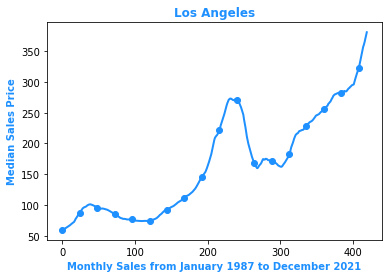

In [15]:
dataset = pandas.read_csv('/content/sample_data/la.csv', usecols=[1], engine='python')
plt.plot(dataframe, linewidth=2, markevery=24, marker='o', color='dodgerblue')
plt.ylabel('Median Sales Price', fontweight='bold', color='dodgerblue')
plt.xlabel('Monthly Sales from January 1987 to December 2021',fontweight='bold', color='dodgerblue')
plt.title('Los Angeles', fontweight='bold', color='dodgerblue')
plt.show()

(array([107.,  74.,  17.,  63.,  29.,  44.,  54.,  19.,   6.,   7.]),
 array([ 59.42622437,  91.57365238, 123.7210804 , 155.86850841,
        188.01593642, 220.16336444, 252.31079245, 284.45822046,
        316.60564847, 348.75307649, 380.9005045 ]),
 <a list of 10 Patch objects>)

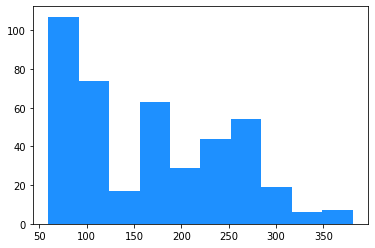

In [16]:
plt.hist(dataframe['LXXRSA'], color = 'dodgerblue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


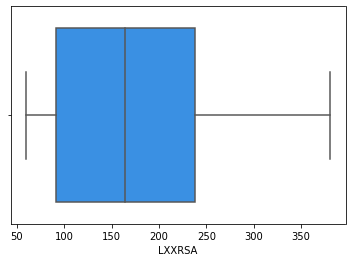

In [17]:
sns.boxplot(dataframe['LXXRSA'], color='dodgerblue')

### **A visual check shows no normal distribution.**

In [18]:
# test run for stationarity
result = adfuller(dataframe['LXXRSA'])

# print the results
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))



ADF Statistic: 0.556209
p-value: 0.986485
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


**We fail to reject the null hypothesis so dataset is non - stationary because p - value is greater than 0.05**

**However, the ADF Statistic is close to zero and the cascade of critical values show that the non - stationary is not very strong.**

**There is some stable stationary parts of the dataset.**

In [34]:
# normality test
stat, p = jarque_bera(dataframe['LXXRSA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=31.763, p=0.000
Sample does not look Gaussian (reject H0)


In [20]:
dataframe['LXXRSA'].skew(), dataframe['LXXRSA'].kurt()

(0.45251330427603176, -0.9985013465659076)

**In a similar fashion to stationarity, the dataset is non - normal, but the JB statistic is not extreme.**

**There is some level of normality in the dataset.**

**Both the third and fourth moments of distribution are near zero.**

**Let's do some cross validation below.**

In [21]:
half_dataframe = dataframe.iloc[:144,:]
half_dataframe.reset_index()
half_dataframe.describe()

,LXXRSA
count,144.000
mean,82.319
std,10.575
min,59.426
25%,74.512
50%,79.695
75%,91.814
max,100.993


**The first third of the dataset from January 1987 to December 1998 will be retested statistically.**

In [22]:
half_dataframe.head()

,LXXRSA
0,59.426
1,59.895
2,60.401
3,61.324
4,62.031


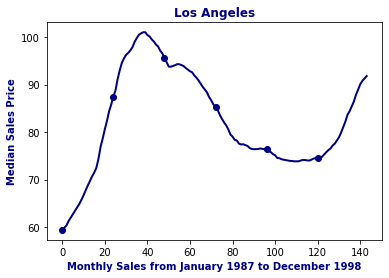

In [41]:
plt.plot(half_dataframe, linewidth=2, markevery=24, marker='o', color='navy')
plt.ylabel('Median Sales Price', fontweight='bold', color='navy')
plt.xlabel('Monthly Sales from January 1987 to December 1998',fontweight='bold', color='navy')
plt.title('Los Angeles', fontweight='bold', color='navy')
plt.show()

In [26]:
# test run for stationarity
result = adfuller(half_dataframe['LXXRSA'])

# print the results
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistic: -3.214889
p-value: 0.019139
Critical Values:
	1%: -3.478
	5%: -2.883
	10%: -2.578


**About the first third of the time series is stationary as the p-value is below the 5% and the ADF Statistic is not positive, but negative.**

In [35]:
# normality test
stat, p = jarque_bera(half_dataframe['LXXRSA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
 

Statistics=4.396, p=0.111
Sample looks Gaussian (fail to reject H0)


In [38]:
half_dataframe['LXXRSA'].skew(), half_dataframe['LXXRSA'].kurt()

(0.026731441666087947, -0.8418780523845899)

### **EDA Conclusion**

**The result of the Exploratory Data Analysis is a dataset that begins in a normal distribution with the stability of a stationary times series, which is suitable for linear models.**

**A regime switch occurred a little over two decades ago in 1999 as the common tendencies of an average with its variation become less stable with non – stationarity coupled with non – normality leading to a possible struggle of linear models.**